In [1]:
%pylab inline
import pandas as pd

from mpl_toolkits.axes_grid.inset_locator import inset_axes

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

results = pd.read_csv('BC_final_results.csv', index_col=0)
ms_results = pd.read_csv('BC_MS_results.csv', index_col=0)
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

import NaiveDE

dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm.T, 'np.log(total_counts)').T

Populating the interactive namespace from numpy and matplotlib


/Users/vale/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
res.shape

(250, 12856)

In [3]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)

sres = results.query('qval < 0.05 & g != "log_total_count"').copy()

X = sample_info[['x', 'y']].values

In [4]:
import SpatialDE

In [14]:
histology_results, patterns = SpatialDE.spatial_patterns(X, res, sres, 5, 1.05, verbosity=1)

iter 0, ELBO: -3.45e+04
iter 1, ELBO: -6.63e+04, delta_ELBO: 3.18e+04
iter 2, ELBO: -6.97e+04, delta_ELBO: 3.47e+03
iter 3, ELBO: -7.19e+04, delta_ELBO: 2.17e+03
iter 4, ELBO: -7.21e+04, delta_ELBO: 2.14e+02
iter 5, ELBO: -7.21e+04, delta_ELBO: 1.85e+00
iter 6, ELBO: -7.22e+04, delta_ELBO: 4.60e+01
iter 7, ELBO: -7.22e+04, delta_ELBO: 1.50e+00
iter 8, ELBO: -7.21e+04, delta_ELBO: 7.90e+00
iter 9, ELBO: -7.22e+04, delta_ELBO: 9.37e+00
iter 10, ELBO: -7.22e+04, delta_ELBO: 1.01e-01
iter 11, ELBO: -7.22e+04, delta_ELBO: 9.84e-03
iter 12, ELBO: -7.22e+04, delta_ELBO: 5.39e-03
iter 13, ELBO: -7.22e+04, delta_ELBO: 2.90e-03
iter 14, ELBO: -7.22e+04, delta_ELBO: 1.59e-03
iter 15, ELBO: -7.22e+04, delta_ELBO: 8.94e-04
iter 16, ELBO: -7.22e+04, delta_ELBO: 6.74e-04
iter 17, ELBO: -7.22e+04, delta_ELBO: 1.17e-04
iter 18, ELBO: -7.22e+04, delta_ELBO: 4.09e-04
iter 19, ELBO: -7.22e+04, delta_ELBO: 1.55e-04
iter 20, ELBO: -7.22e+04, delta_ELBO: 4.92e-05
Converged on iter 20


In [15]:
K_hat = len(histology_results.pattern.unique())
K_hat

5

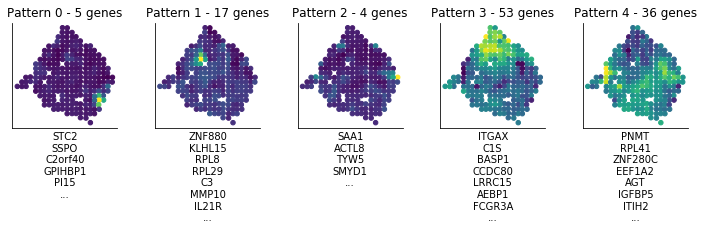

In [23]:
figsize(10, 3.3)
for i, Ci in enumerate(histology_results.sort_values('pattern').pattern.unique()):
    C = patterns[Ci]
    plt.subplot(1, K_hat, i + 1)
    plt.scatter(X[:,0], -X[:,1], c=C, s=20)
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(Ci, histology_results.query('pattern == @Ci').shape[0] ))
    
    xlab = '\n'.join(histology_results.query('pattern == @Ci').sort_values('membership')['g'].tolist()[:7])
    plt.xlabel(xlab + '\n...')
    
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.savefig('BC_AEH.pdf', bbox_inches='tight')

In [17]:
for i in histology_results.sort_values('pattern').pattern.unique():
    
    print('Pattern {}'.format(i))
    print(', '.join(histology_results.query('pattern == @i').sort_values('membership')['g'].tolist()))
    print()

Pattern 0
STC2, SSPO, C2orf40, GPIHBP1, PI15

Pattern 1
ZNF880, KLHL15, RPL8, RPL29, C3, MMP10, IL21R, PAQR8, ETV7, IGLL5, RPL13, CXCL13, IL12RB1, RPL28, CST3, SNAP25, CXCL9

Pattern 2
SAA1, ACTL8, TYW5, SMYD1

Pattern 3
ITGAX, C1S, BASP1, CCDC80, LRRC15, AEBP1, FCGR3A, FGG, CRISPLD2, HLA-DRA, ADAMTS2, TGM2, COL5A1, ASPN, SULF1, GBP1, RARRES1, FGB, COL1A2, LUM, THBS2, FN1, PALLD, CTHRC1, COL11A1, PRRX1, SPP1, CTSK, VIM, MMP13, GJA1, COL6A3, MMP11, TMSB4X, CILP, HTRA1, TNC, COL5A2, POSTN, SPARC, COL12A1, COL3A1, LOX, DCN, B2M, ANTXR1, SOD2, VCAN, COL1A1, HMCN1, MAFB, SFRP2, COL10A1

Pattern 4
PNMT, RPL41, ZNF280C, EEF1A2, AGT, IGFBP5, ITIH2, GHRH, WDR5B, LY6E, CST1, CTSD, WFDC2, PEG10, PPP1R1B, AZGP1, BEX1, TFF1, CST4, TP53INP2, HPS3, DBI, STARD10, SLC16A6, BST2, TFF3, SERPINA5, HPN, GPC3, SPINT2, PRSS23, CLEC3A, SLX4, HMGCS2, COX6B1, FXYD3



In [18]:
histology_results.sort_values('membership', ascending=False).head()

,g,membership,pattern
10530,COL12A1,1.0,3
10636,WFDC2,1.0,4
10862,MAFB,1.0,3
10854,HMCN1,1.0,3
10777,COL1A1,1.0,3


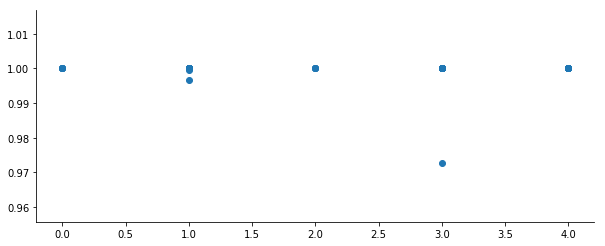

In [19]:
plt.scatter(histology_results.pattern, histology_results.membership);

In [20]:
histology_results.to_csv('bc_aeh_results.csv')